This is an example for Na I D and H$\alpha$ equivalent width (EW) estimation.

In [1]:
from sn_line_vel.SpectrumSN import SpectrumSN

import pymc as pm
import arviz as az
import numpy as np

# read spec data
z = 0.0307
spec = './test_data/host_20220331_Keck2_corrected.ascii'
Spec = SpectrumSN(spec, 0, spec_resolution=2.5) #spectral FWHM resolution = 2.5 Ang

# Na I D

<AxesSubplot:xlabel='$\\mathrm{Wavelength}\\ [\\mathrm{\\r{A}}]$', ylabel='$\\mathrm{Flux}$'>

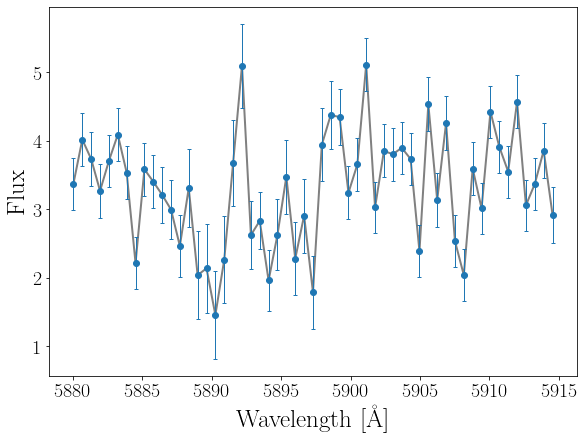

In [2]:
Spec.plot_line_region(5880, 5915)

In [3]:
Spec.add_line("NaI_D", 5880, 5910, lines=[[5889.950, 5895.924]], rel_strength=[[2, 1]])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [blue_fl, red_fl, A, v_mean, ln_v_sig, sigma_0]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 32 seconds.


             mean      sd  hdi_16%  hdi_84%  mcse_mean  mcse_sd  ess_bulk  \
v_mean[0] -43.035  50.851  -67.961   -1.597      1.478    1.351  2018.151   
v_sig[0]   79.839  73.243   17.596   89.103      1.751    1.239  1989.437   
A[0]      -47.215  14.829  -62.643  -33.820      0.315    0.231  2144.312   
sigma_0     0.185   0.032    0.152    0.214      0.001    0.000  2711.191   
EW_0        2.432   0.730    1.791    3.209      0.015    0.011  2259.198   

           ess_tail  r_hat  
v_mean[0]  1039.034  1.002  
v_sig[0]   2081.220  1.001  
A[0]       1463.066  1.000  
sigma_0    2008.382  1.001  
EW_0       1805.785  1.000  


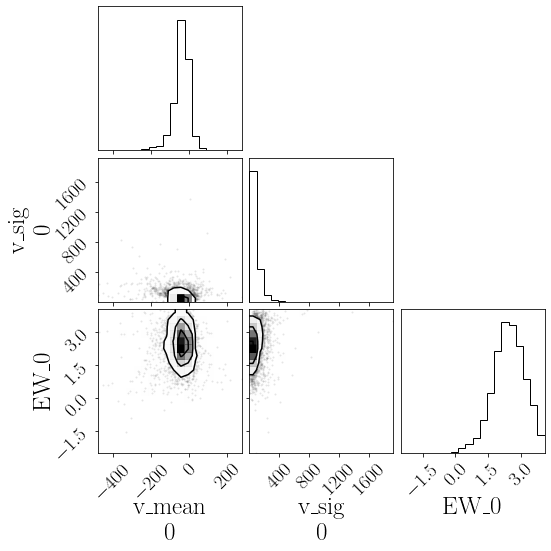

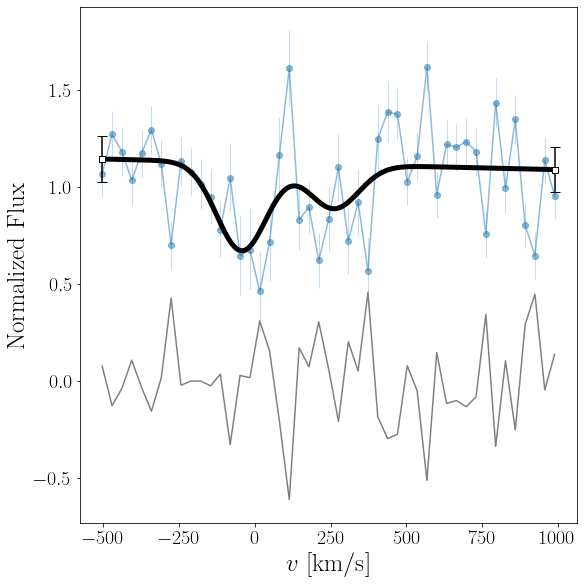

In [4]:
trace_NaI, Model_NaI, ax = Spec.line["NaI_D"].MCMC_sampler(
    vel_mean_mu=[0],
    vel_mean_sig=[2e2],
    ln_vel_sig_mu=np.log([1e2]),
    ln_vel_sig_sig=[1],
    A_lim=[-8e1, 8e1],
    target_accept=0.95,
    plot_mcmc=True,
    nburn=2000,
    initial=(1,1,0,5,-1e1)
)

# H$\alpha$ + [N ii] $\lambda$6583

<AxesSubplot:xlabel='$\\mathrm{Wavelength}\\ [\\mathrm{\\r{A}}]$', ylabel='$\\mathrm{Flux}$'>

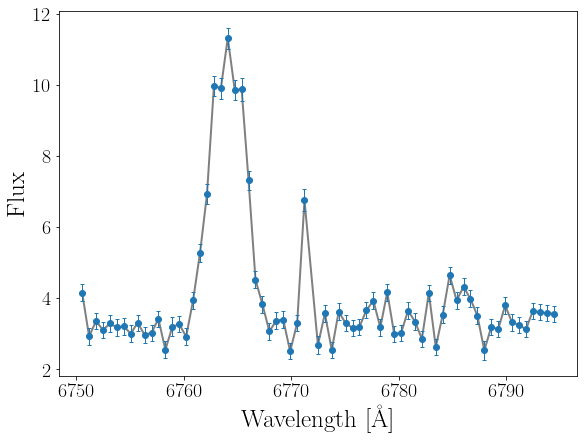

In [5]:
Spec.plot_line_region(6750, 6795)

In [6]:
Spec.add_line("Halpha/Nii", 6755, 6795, lines=[[6562.8], [6583]], rel_strength=[[1], [1]])

Auto-assigning NUTS sampler...
INFO:pymc:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [blue_fl, red_fl, A, v_mean, ln_v_sig, sigma_0]
INFO:pymc:NUTS: [blue_fl, red_fl, A, v_mean, ln_v_sig, sigma_0]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 46 seconds.
INFO:pymc:Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 46 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc:There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


               mean       sd   hdi_16%   hdi_84%  mcse_mean  mcse_sd  \
v_mean[0]  9052.693    3.876  9049.010  9056.447      0.069    0.049   
v_mean[1]  9054.021   10.421  9044.503  9064.768      0.187    0.132   
v_sig[0]     50.089    5.068    44.719    54.752      0.095    0.067   
v_sig[1]    160.685  234.303     2.251   130.737      6.756    4.778   
A[0]        441.012   23.976   417.136   463.867      0.477    0.337   
A[1]         67.829   71.726    10.812    65.497      2.296    1.624   
sigma_0       0.189    0.022     0.164     0.207      0.000    0.000   
EW_0         -9.670    0.711   -10.300    -8.935      0.016    0.012   
EW_1         -1.519    1.690    -1.465    -0.255      0.054    0.038   

           ess_bulk  ess_tail  r_hat  
v_mean[0]  3192.966  2438.903  1.001  
v_mean[1]  3114.355  2709.967  1.001  
v_sig[0]   2831.705  2660.122  1.000  
v_sig[1]   1467.079  2380.918  1.002  
A[0]       2510.457  2195.598  1.000  
A[1]       1092.402  1486.438  1.001  
sigma_

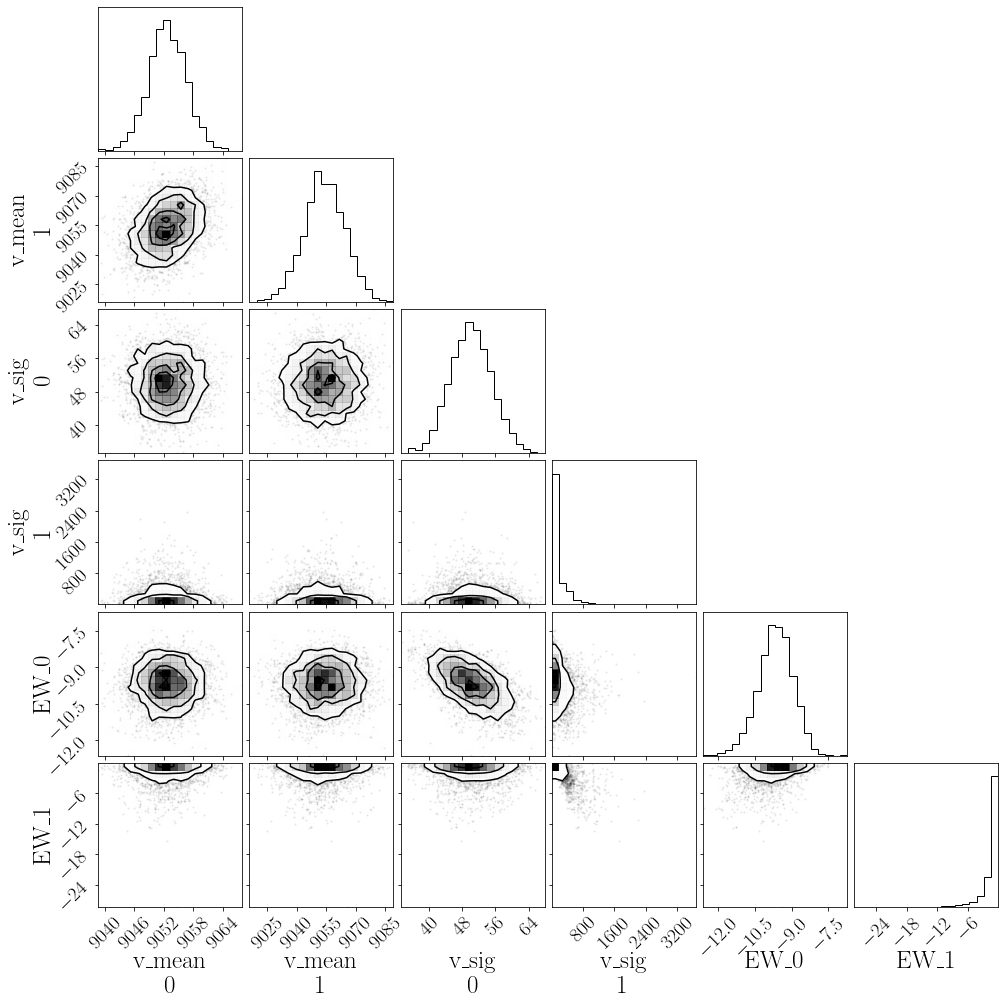

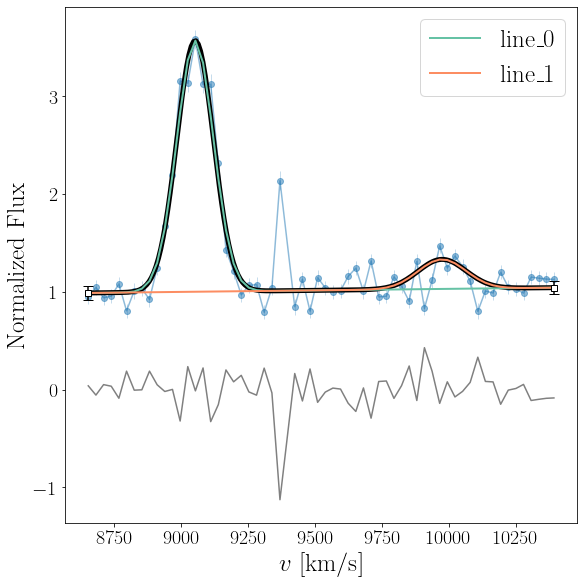

In [7]:
trace_H, Model_H, ax = Spec.line["Halpha/Nii"].MCMC_sampler(
    vel_mean_mu=[9e3, 9e3],
    vel_mean_sig=[1e2, 1e2],
    vel_mean_diff=[(0, 1, 1e1)],
    ln_vel_sig_mu=np.log([1e2, 1e2]),
    ln_vel_sig_sig=[2, 2],
    ln_vel_sig_diff=[(0, 1, .05)],
    A_lim=[0, 1e5],
    target_accept=0.95,
    plot_mcmc=True,
    initial=(1, 1, 1e4, 7, 1e3, 1e4, 7, 1e3),
)